In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df1=pd.read_csv('Sales Dataset.csv')
df1.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [119]:
df1.shape

(1194, 12)

In [120]:
df1['City'].unique()

array(['Miami', 'Chicago', 'Buffalo', 'Orlando', 'Los Angeles',
       'New York City', 'Springfield', 'Rochester', 'Dallas', 'San Diego',
       'Austin', 'San Francisco', 'Columbus', 'Cincinnati', 'Cleveland',
       'Houston', 'Tampa', 'Peoria'], dtype=object)

In [121]:
df1['Category'].unique()

array(['Electronics', 'Office Supplies', 'Furniture'], dtype=object)

In [122]:
df1['PaymentMode'].unique()

array(['UPI', 'Debit Card', 'EMI', 'Credit Card', 'COD'], dtype=object)

In [123]:
# df1['CustomerName'].unique()

In [124]:
df1.isna().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [125]:
df1.isna().sum().sum()

0

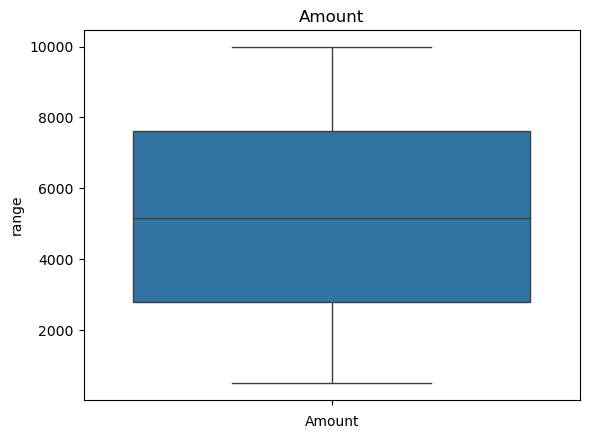

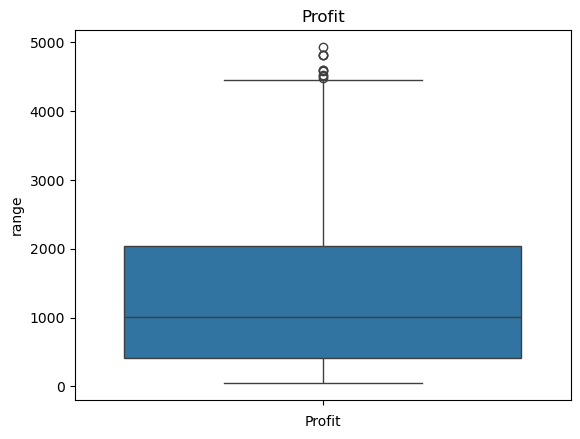

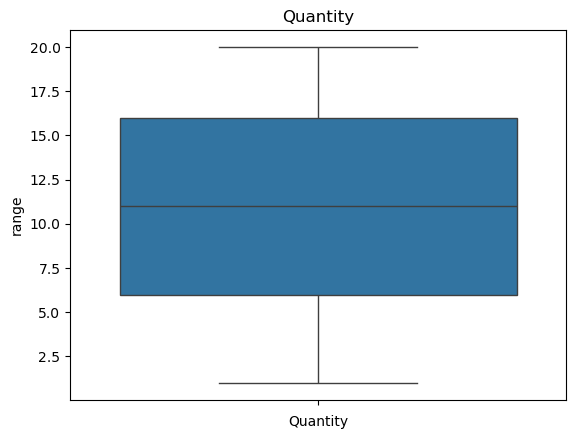

In [126]:
df1.columns
for i in df1.columns:
    if df1[i].dtype!='object':
        sns.boxplot(df1[i])
        plt.xlabel(i)
        plt.ylabel('range')
        plt.title(i)
        plt.show()

In [127]:
    # Q1=df1['Profit'].quantile(0.25)
    # Q3=df1['Profit'].quantile(0.75)
    # IQR=Q3-Q1
    # LF=Q1-1.5*IQR
    # UF=Q3+1.5*IQR
    # df1=df1[(df1['Profit']>=LF) & (df1['Profit']<=UF)]

In [128]:
# df1.shape

In [129]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df1['Profit']))
print(z)

0       0.066211
1       0.066211
2       0.066211
3       0.016995
4       0.016995
          ...   
1189    2.008912
1190    0.632642
1191    0.632642
1192    0.632642
1193    1.061268
Name: Profit, Length: 1194, dtype: float64


In [130]:
threshold=3
outliers=df1[z > threshold]
print(outliers)

    Order ID  Amount  Profit  Quantity         Category Sub-Category  \
189  B-25901    9883    4812        16  Office Supplies        Paper   
190  B-25901    9883    4812        16  Office Supplies        Paper   
191  B-25901    9883    4812        16  Office Supplies        Paper   
834  B-26357    9879    4930        15      Electronics      Laptops   

    PaymentMode  Order Date       CustomerName     State         City  \
189         UPI  2020-10-20  Jeffrey Middleton  New York      Buffalo   
190         UPI  2022-08-11    Veronica Kelley   Florida      Orlando   
191         UPI  2021-10-17        Leslie Bean  Illinois  Springfield   
834  Debit Card  2023-06-08     Brandi Vasquez  New York    Rochester   

    Year-Month  
189    2020-10  
190    2022-08  
191    2021-10  
834    2023-06  


In [133]:
# # drop outliers
# df1=df1.drop(outliers.index)

In [134]:
# df1.shape

In [137]:
# replace outliers with median value
df1.loc[z > threshold, 'Profit'] = df1['Profit'].median()

In [138]:
df1.shape

(1190, 12)